In [1]:
%matplotlib inline
import numpy as np
import matplotlib.cm as cm
from matplotlib import pyplot as plt
plt.style.use('ggplot')

# Gradient Descent
$
\begin{eqnarray}
x_{i+1}&=&x_{t} - \eta \frac{\partial F}{\partial x} \\
x_{t+1} - x_{t}&=& -\eta \frac{\partial F}{\partial x} \\
\Delta x &=& -\eta \frac{\partial F}{\partial x}
\end{eqnarray}
$

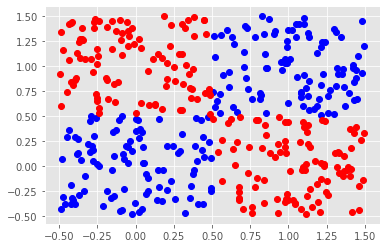

In [2]:
x=[]
yt=[]
for i in range(100):
    x.append( [0.5+np.random.rand(), 0.5+np.random.rand()])
    x.append( [-0.5+np.random.rand(), -0.5+np.random.rand()])
    yt.append([0 , 1])
    yt.append([0 , 1])

for i in range(100):
    x.append( [0.5+np.random.rand(), -0.5+np.random.rand()])
    x.append( [-0.5+np.random.rand(), 0.5+np.random.rand()])
    yt.append([1 , 0])
    yt.append([1 , 0])
    
x=np.array(x)
yt=np.array(yt)

plt.plot( x[yt[:,1]==1,0], x[yt[:,1]==1,1], 'ob')
plt.plot( x[yt[:,0]==1,0], x[yt[:,0]==1,1], 'or')

In [3]:
def g(x):    
    return 1/(1+np.exp(-x))

def grad_g(g):
        return (1-g)*g

# Single Layer Perceptron

## Error
$
\begin{eqnarray}
E&=&\frac{1}{2} (y_p-y_t)^2\\
\end{eqnarray}
$

## Input and output
$
\begin{eqnarray}
a_0 &\Leftarrow &X\\
y_p& \Leftarrow &a_2\\
\end{eqnarray}
$

## Forward Network
$
\begin{eqnarray}
z_0&=&a_0.w_0+b_0\\
a_1&=&g(z_0)\\
z_1&=&a_1.w_1+b_1\\
a_2&=&g(z_1)\\
\end{eqnarray}
$

# Backpropagation on w0
$
\begin{eqnarray}
\Delta w_0 &=& -\eta \frac{\partial E}{\partial w_0}\\
\frac{\partial E}{\partial w_0} &=& \frac{\partial E}{\partial y_p} \frac{\partial y_p}{\partial a_2} \frac{\partial a_2}{\partial z_1} \frac{\partial z_1}{\partial a_1} \frac{\partial a_1}{\partial z_0} \frac{\partial z_0}{\partial w_0} \\
\frac{\partial E}{\partial y_p} &=& y_p-y_t \\
\frac{\partial y_p}{\partial a_2} &=& 1 \\
\frac{\partial a_2}{\partial z_1} &=& \frac{\partial g(z_1)}{\partial z_1} \\
\frac{\partial z_1}{\partial a_1} &=& w_1 \\
\frac{\partial a_1}{\partial z_0} &=& \frac{\partial g(z_0)}{\partial z_0} \\
\frac{\partial z_0}{\partial w_0} &=& a_0 \\
\end{eqnarray}
$

In [4]:
#random init weight and bias
np.random.seed(1)
N0=4 #first layer 4 nodes
N1=2 #second layer 2 nodes
eta=0.01
a0=np.ones([x.shape[0],x.shape[1]+1]) #[Nx3]
a0[:,:-1]=x

w0 = np.random.random((2,N0)) # 2 inputs x 4 nodes
b0 = np.random.random((1,N0)) # 1 bias x 4 nodes
wb0=np.concatenate((w0, b0), axis=0)

a1=np.ones([x.shape[0],N0+1])
w1 = np.random.random((N0,N1)) # 4 inputs x 2 nodes
b1 = np.random.random((1,N1)) # 1 bias x 2 nodes
wb1=np.concatenate((w1, b1), axis=0)

for i in range(10000):
    #forward x=a0, a2=yp
    z0=np.dot(a0,wb0)
    a1[:,:-1]=g(z0)
    #a1=np.concatenate([g(z0),np.ones([a0.shape[0],1])], axis=1)
    
    z1=np.dot(a1,wb1)
    a2=g(z1)
    
    #backward
    d_a2=yt-a2
    d_z1=d_a2*grad_g(a2)
    wb1 += eta*np.dot(a1.T,d_z1)
    
    d_a1=np.dot(d_z1,wb1.T)
    d_z0=d_a1*grad_g(a1)
    wb0 += eta*np.dot(a0.T,d_z0[:,:-1])
    
    if(i % 1000) == 0:   # Only print the error every 10000 steps
        E=0.5*np.sum(np.square(d_a2))
        print("Error: {}".format(E))

Error: 152.95263879980524
Error: 17.403221487654136
Error: 12.107999760381736
Error: 10.348259549819879
Error: 9.36514511411621
Error: 8.697119182298675
Error: 8.199007776651975
Error: 7.806827880457898
Error: 7.486366797958167
Error: 7.217180460219044


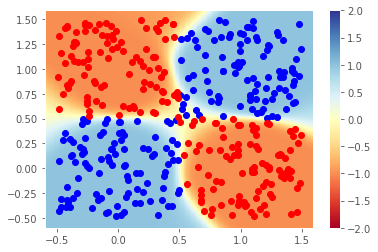

In [10]:
my,mx=np.mgrid[slice(-0.6,1.6,0.01),slice(-0.6,1.6,0.01)]
out=np.zeros(mx.shape)
for i in range(mx.shape[0]):
    for j in range(mx.shape[1]):
        u=[ mx[i,j], my[i,j],1]
        #forward
        ha1=np.concatenate( [ g(np.dot(u,wb0)), [1]])
        ha2=g(np.dot(ha1,wb1))
        out[i,j]=ha2[1]-ha2[0]
plt.pcolor(mx,my,out,cmap=cm.RdYlBu,vmin = -2,vmax=2)
plt.colorbar()
plt.plot( x[yt[:,1]==1,0], x[yt[:,1]==1,1], 'ob')
plt.plot( x[yt[:,0]==1,0], x[yt[:,0]==1,1], 'or')